This is for a basic buy and hold strategy analyzing MSFT's performance for thepast 5 years dating back to 2018





In [ ]:
!python --version

Python 3.10.12


In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.11


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.11 is already the newest version (3.11.7-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
!python --version

Python 3.10.12


In [4]:
import pandas

data = pandas.read_csv("msft_5y.csv", index_col=["Date"])

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-02 00:00:00-05:00,88.182170,88.492938,86.166901,86.430580,47867800,0.0,0.0
2018-02-05 00:00:00-05:00,85.281698,87.805495,82.870911,82.870911,51031500,0.0,0.0
2018-02-06 00:00:00-05:00,81.825604,86.148079,80.281193,86.006821,67998600,0.0,0.0
2018-02-07 00:00:00-05:00,85.215768,86.421162,84.000956,84.387062,41107600,0.0,0.0
2018-02-08 00:00:00-05:00,84.481232,84.641322,79.819747,80.055176,55628700,0.0,0.0


In [ ]:
data.index = pandas.to_datetime(data.index)
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-26 00:00:00-05:00,243.649994,248.309998,242.000000,248.000000,33454500,0.0,0.0
2023-01-27 00:00:00-05:00,248.990005,249.830002,246.830002,248.160004,26480800,0.0,0.0
2023-01-30 00:00:00-05:00,244.509995,245.600006,242.199997,242.710007,25867400,0.0,0.0
2023-01-31 00:00:00-05:00,243.449997,247.949997,242.949997,247.809998,26525300,0.0,0.0
2023-02-01 00:00:00-05:00,248.000000,255.179993,245.470001,252.750000,29988688,0.0,0.0


In [ ]:
data = data.asfreq("M")

data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-28 00:00:00-05:00,89.731759,90.554902,88.586932,88.719391,31167300.0,0.0,0.0
2018-03-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-30 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-28 00:00:00-05:00,89.731759,90.554902,88.586932,88.719391,31167300.0,0.0,0.0
2018-11-30 00:00:00-05:00,106.052502,106.311171,104.768762,106.234528,33665600.0,0.0,0.0
2018-12-31 00:00:00-05:00,97.037550,98.100950,96.223237,97.305794,33173800.0,0.0,0.0
2019-01-31 00:00:00-05:00,99.442167,100.802550,98.848194,100.045715,55636400.0,0.0,0.0
2019-02-28 00:00:00-05:00,107.794642,108.602810,107.496391,107.785019,29083900.0,0.0,0.0


In [9]:
percent_change = data.pct_change()
percent_change.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-02-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-05 00:00:00-05:00,-0.032892,-0.007768,-0.038251,-0.041185,0.066092,NaN,NaN
2018-02-06 00:00:00-05:00,-0.040526,-0.018876,-0.031250,0.037841,0.332483,NaN,NaN
2018-02-07 00:00:00-05:00,0.041432,0.003170,0.046334,-0.018833,-0.395464,NaN,NaN
2018-02-08 00:00:00-05:00,-0.008620,-0.020595,-0.049776,-0.051334,0.353246,NaN,NaN


In [11]:
percent_change = percent_change [["Open", "High", "Low", "Close", "Volume"]]
percent_change.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-02-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2018-02-05 00:00:00-05:00,-0.032892,-0.007768,-0.038251,-0.041185,0.066092
2018-02-06 00:00:00-05:00,-0.040526,-0.018876,-0.031250,0.037841,0.332483
2018-02-07 00:00:00-05:00,0.041432,0.003170,0.046334,-0.018833,-0.395464
2018-02-08 00:00:00-05:00,-0.008620,-0.020595,-0.049776,-0.051334,0.353246


In [ ]:
percent_change = percent_change.dropna()
percent_change.head()

In [10]:
returns = percent_change.mean(axis = 1)
returns.head

<bound method NDFrame.head of Date
2018-02-02 00:00:00-05:00         NaN
2018-02-05 00:00:00-05:00   -0.010801
2018-02-06 00:00:00-05:00    0.055934
2018-02-07 00:00:00-05:00   -0.064672
2018-02-08 00:00:00-05:00    0.044584
                               ...   
2023-01-26 00:00:00-05:00   -0.071728
2023-01-27 00:00:00-05:00   -0.031962
2023-01-30 00:00:00-05:00   -0.019762
2023-01-31 00:00:00-05:00    0.010955
2023-02-01 00:00:00-05:00    0.041745
Length: 1258, dtype: float64>

In [12]:
total_returns = (returns+1).cumprod()
total_returns.head()

Date
2018-02-02 00:00:00-05:00         NaN
2018-02-05 00:00:00-05:00    0.989199
2018-02-06 00:00:00-05:00    1.044529
2018-02-07 00:00:00-05:00    0.976977
2018-02-08 00:00:00-05:00    1.020535
dtype: float64

<Axes: xlabel='Date', ylabel='Returns'>

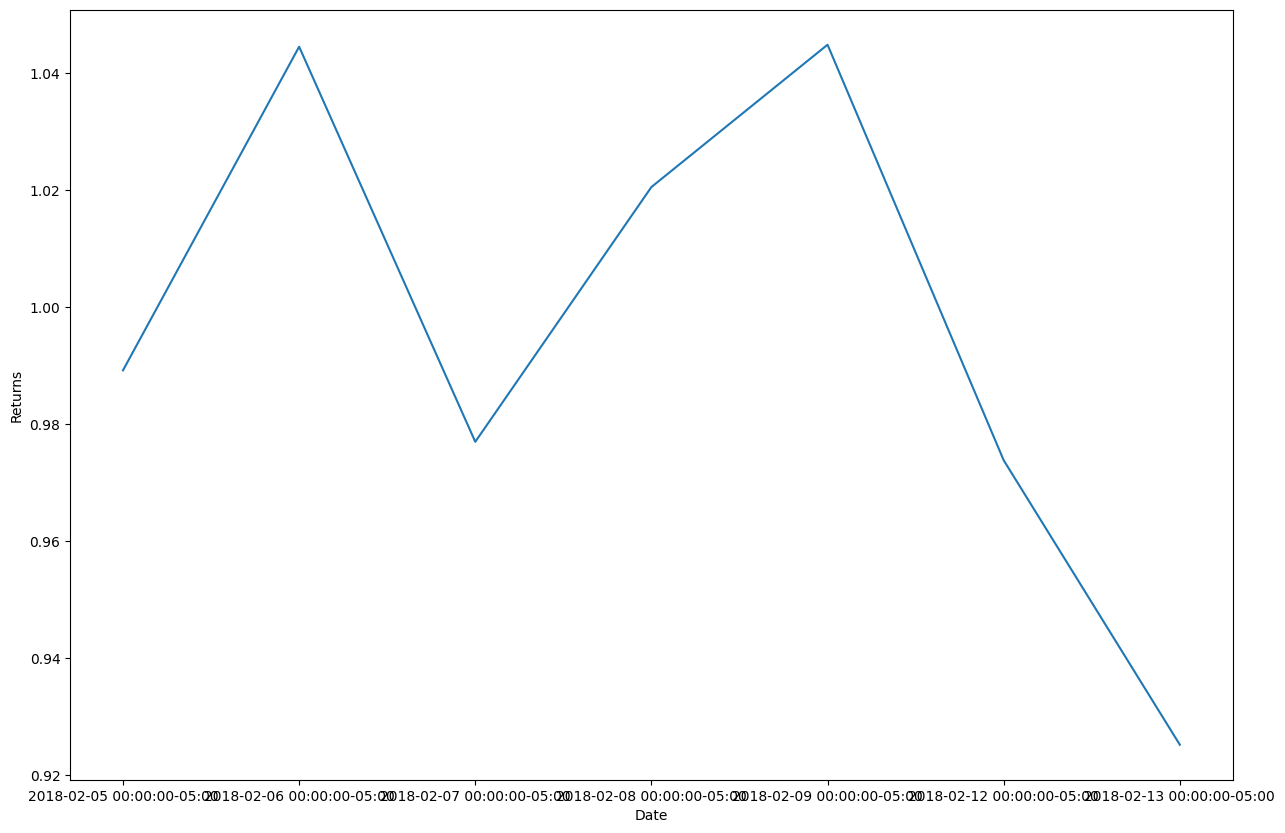

In [16]:
import matplotlib.pyplot as pyplot

pyplot.rcParams["figure.figsize"] = (15,10)
pyplot.ylabel("Returns")

total_returns.plot()